# Oasis Infobyte Internship - Data Science Intern - Task 2

By: Abhinandan S Vishwaroop 

Dataset: SMS Spam Collection dataset 

Source: Kaggle

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [1]:
#Import python liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score

In [2]:
data = pd.read_csv("spam.csv",encoding="latin1")

In [3]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
# check columns available in the dataset
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
# check statistics 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
print('rows-',data.shape[0])
print('columns-',data.shape[1])

rows- 5572
columns- 5


In [7]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
data.isnull().mean()*100  #check the percentage of null value

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

As we can see there are many null or missing values in the dataset in Unnamed 2 , Unnamed 3 and Unnamed 4 (around 99%). Let's discard these columns.

In [10]:
data.drop(columns = data[['Unnamed: 2','Unnamed: 3','Unnamed: 4']], axis=1, inplace=True)

In [11]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
# let's rename the columns from v1 -> "spam/ham" and v2 -> "Message" for better understanding
data.columns=['spam/ham','Message']

In [15]:
ans = {'spam': 0, 'ham':1}

data = data.replace(ans)
data

,spam/ham,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


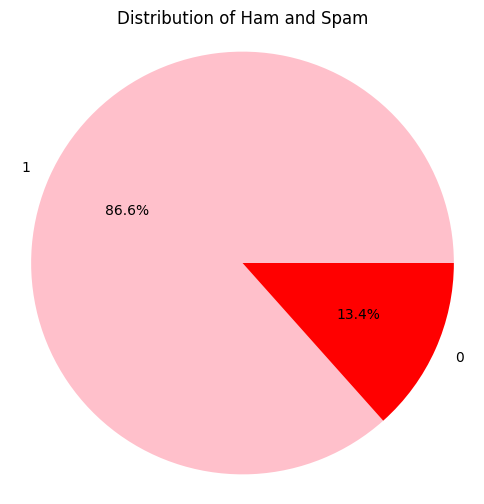

In [18]:
counts = data['spam/ham'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['pink', 'red'])
plt.title('Distribution of Ham and Spam')
plt.axis('equal') 
plt.show()

In [19]:
# drop the duplicate values
data.drop_duplicates(inplace=True)

In [20]:
data.shape

(5169, 2)

In [21]:
x = data.Message

In [22]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object

In [24]:
y = data['spam/ham']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: spam/ham, Length: 5169, dtype: int64

In [25]:
# let's divide the datset into training and testing data to train the model
from sklearn.model_selection import train_test_split

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state = 3)

In [27]:
xtrain, xtest

(4443                       COME BACK TO TAMPA FFFFUUUUUUU
 982     Congrats! 2 mobile 3G Videophones R yours. cal...
 3822    Please protect yourself from e-threats. SIB ne...
 3924       As if i wasn't having enough trouble sleeping.
 4927    Just hopeing that wasnÛ÷t too pissed up to re...
                               ...                        
 806      sure, but make sure he knows we ain't smokin yet
 990                                          26th OF JULY
 1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
 3519    No it will reach by 9 only. She telling she wi...
 1745    IåÕm cool ta luv but v.tired 2 cause i have be...
 Name: Message, Length: 4135, dtype: object,
 4994    Just looked it up and addie goes back Monday, ...
 4292    You best watch what you say cause I get drunk ...
 4128                 Me i'm not workin. Once i get job...
 4429          Yar lor... How u noe? U used dat route too?
 660     Under the sea, there lays a rock. In the rock,...
           

In [28]:
ytrain, ytest

(4443    1
 982     0
 3822    1
 3924    1
 4927    1
        ..
 806     1
 990     1
 1723    1
 3519    1
 1745    1
 Name: spam/ham, Length: 4135, dtype: int64,
 4994    1
 4292    1
 4128    1
 4429    1
 660     1
        ..
 4003    1
 1107    1
 5413    1
 1413    0
 4998    1
 Name: spam/ham, Length: 1034, dtype: int64)

We know that the data set we have is categorical in nature. For the ML algorithms to provide good accuarcy, we need to convert data set into numerical one i.e, in the form of numbers. To do so, use TfidfVectorizer techinque from feature_extraction of sklearn.

In [29]:
feat_vect = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
feat_vect

TfidfVectorizer(stop_words='english')

In [30]:
ytrain = ytrain.astype('int')
ytest = ytest.astype('int')

In [31]:
xtrain_vec = feat_vect.fit_transform(xtrain)
xtest_vec = feat_vect.transform(xtest)

In [32]:
print(xtrain)

4443                       COME BACK TO TAMPA FFFFUUUUUUU
982     Congrats! 2 mobile 3G Videophones R yours. cal...
3822    Please protect yourself from e-threats. SIB ne...
3924       As if i wasn't having enough trouble sleeping.
4927    Just hopeing that wasnÛ÷t too pissed up to re...
                              ...                        
806      sure, but make sure he knows we ain't smokin yet
990                                          26th OF JULY
1723    Hi Jon, Pete here, Ive bin 2 Spain recently & ...
3519    No it will reach by 9 only. She telling she wi...
1745    IåÕm cool ta luv but v.tired 2 cause i have be...
Name: Message, Length: 4135, dtype: object


In [33]:
xtrain_vec

<4135x7378 sparse matrix of type '<class 'numpy.float64'>'
	with 31488 stored elements in Compressed Sparse Row format>

In [34]:
print(xtrain_vec)

  (0, 2697)	0.7205755344386542
  (0, 6409)	0.5950532917415522
  (0, 1825)	0.35592482233751443
  (1, 5438)	0.27399320458839144
  (1, 4583)	0.27399320458839144
  (1, 4438)	0.22516921191243092
  (1, 5036)	0.27399320458839144
  (1, 2274)	0.27399320458839144
  (1, 2920)	0.23390504161994488
  (1, 3610)	0.27399320458839144
  (1, 4984)	0.19732502227978832
  (1, 4180)	0.23390504161994488
  (1, 7137)	0.24133495616477563
  (1, 6940)	0.27399320458839144
  (1, 203)	0.27399320458839144
  (1, 6941)	0.27399320458839144
  (1, 453)	0.25698446420786897
  (1, 4333)	0.15929709793058355
  (1, 1885)	0.22516921191243092
  (2, 953)	0.26160275768603725
  (2, 4856)	0.26160275768603725
  (2, 5786)	0.26160275768603725
  (2, 2459)	0.22436535516409714
  (2, 4960)	0.26160275768603725
  (2, 5976)	0.1902832473629628
  :	:
  (4132, 6862)	0.11085392369947865
  (4132, 5612)	0.14854309693836068
  (4132, 3865)	0.16898098428277844
  (4133, 6457)	0.6154177820886059
  (4133, 5320)	0.5530764956488926
  (4133, 2311)	0.4238274869

In [35]:
print(xtest_vec)

  (0, 6284)	0.43430701953285156
  (0, 4357)	0.4264504812056483
  (0, 3999)	0.4541039150126108
  (0, 3685)	0.21875536593912145
  (0, 3008)	0.3755569393427584
  (0, 796)	0.48415917776958733
  (1, 7050)	0.41978523395044104
  (1, 5656)	0.35499712111138654
  (1, 2369)	0.5617364019285492
  (1, 1608)	0.47304204171951914
  (1, 1254)	0.398046282326562
  (2, 7221)	0.7923997102028898
  (2, 3640)	0.6100022125126892
  (3, 7292)	0.4854329061592562
  (3, 6879)	0.504266116821645
  (3, 4574)	0.45819212318042857
  (3, 4009)	0.3321387620897908
  (3, 2080)	0.43567694225913534
  (4, 7218)	0.2292199492753507
  (4, 5689)	0.23694703770184997
  (4, 5540)	0.5218991333605264
  (4, 4823)	0.5112231722851113
  (4, 2508)	0.597985350067042
  (5, 3025)	0.5652583430208418
  (5, 1132)	0.8249139383264974
  :	:
  (1031, 5191)	0.3701308998039874
  (1031, 4565)	0.6439113578053595
  (1031, 4068)	0.3041309124908908
  (1031, 510)	0.42409124971092943
  (1032, 7339)	0.2632164916232764
  (1032, 7271)	0.269584829223756
  (1032, 69

In [36]:
logi = LogisticRegression()
logi.fit(xtrain_vec,ytrain)

LogisticRegression()

In [37]:
logi.score(xtrain_vec,ytrain)

0.962273276904474

In [38]:
logi.score(xtest_vec,ytest)

0.960348162475822

In [39]:
pred_logi = logi.predict(xtest_vec)
pred_logi

array([1, 1, 1, ..., 1, 0, 1])

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [41]:
accuracy_score(ytest,pred_logi)

0.960348162475822

In [42]:
confusion_matrix(ytest,pred_logi)

array([[ 99,  41],
       [  0, 894]], dtype=int64)

In [43]:
print(classification_report(ytest,pred_logi))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83       140
           1       0.96      1.00      0.98       894

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In conclusion, this email spam detection project has successfully demonstrated the effectiveness of machine learning algorithms in safeguarding users from unsolicited and potentially harmful emails. Through rigorous data analysis and model development, we have achieved a high level of accuracy in distinguishing spam from legitimate emails. This project not only enhances email security but also underscores the importance of ongoing research and innovation in combating evolving spamming techniques. It serves as a valuable contribution to the broader effort to protect users from digital threats in the ever-evolving landscape of communication technology.